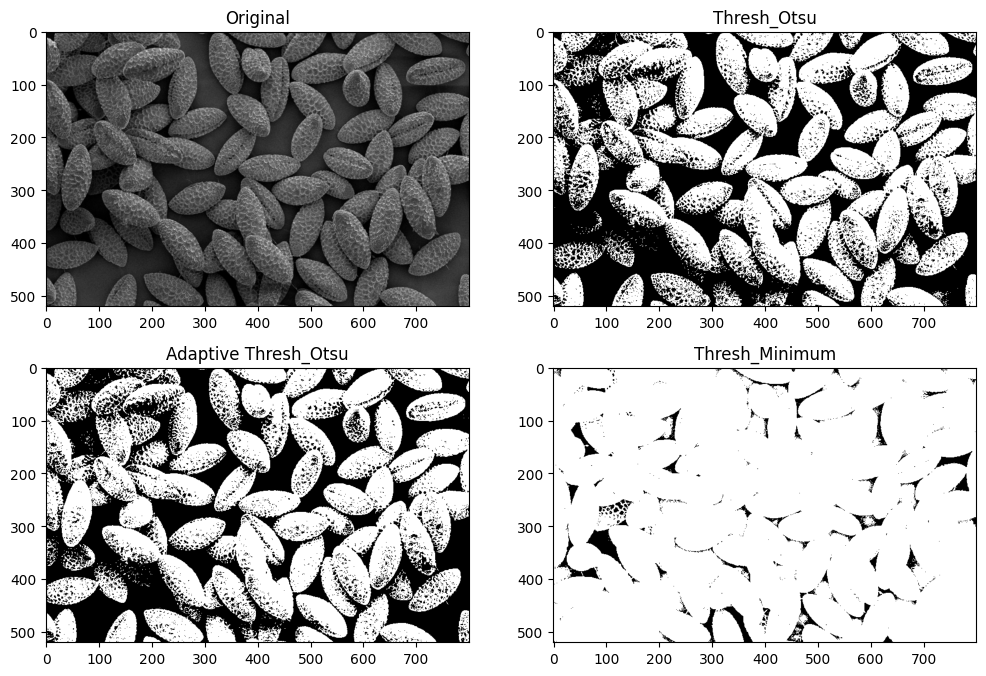

In [1]:
from matplotlib import pyplot as plt
from scipy.ndimage import generic_filter
from skimage.filters import threshold_otsu, threshold_minimum
from skimage.filters import rank
from skimage.morphology import disk, isotropic_opening
from skimage import io, img_as_ubyte
import numpy as np

# Loading the original image
img = io.imread('Pollen_500x_-_SEM_MUSE.jpg')[:,:,0][:520,:]
Fig, axes = plt.subplots(2,2,figsize=(12,8))
ax = axes.ravel()
# Original image
ax[0].imshow(img, 'gray')
ax[0].set_title('Original')

# Thresh_Otsu
thresh_otsu = threshold_otsu(img)
ax[1].imshow(img > thresh_otsu, 'gray')
ax[1].set_title('Thresh_Otsu')

# Thresh_Triangle
thresh_adapt = rank.otsu(img, disk(100))
ax[2].imshow(img > thresh_adapt, 'gray')
ax[2].set_title('Adaptive Thresh_Otsu')

# Thresh_Minimum
thresh_min = threshold_minimum(img)
ax[3].imshow(img > thresh_min, 'gray')
ax[3].set_title('Thresh_Minimum')

plt.show()

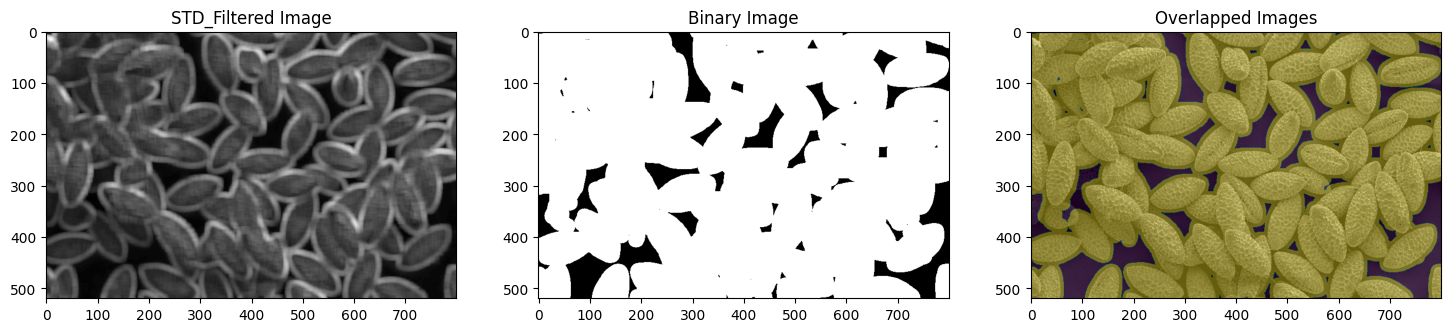

In [2]:
# STD Filtering
Fig, axes = plt.subplots(1,3,figsize=(18,4))
ax = axes.ravel()

# STD Filtering with scipy.ndimage.generic_filter
filt_img = generic_filter(img, np.std, footprint=np.ones((15,15)), mode='nearest')
ax[0].imshow(filt_img, 'gray')
ax[0].set_title('STD_Filtered Image')

# Binary image minimum thresholded 
thresh_std = threshold_minimum(filt_img)
binary = img_as_ubyte(filt_img > thresh_std)
binary = isotropic_opening(binary, 15).astype(np.uint8)
ax[1].imshow(binary, 'gray')
ax[1].set_title('Binary Image')

# The binary image on the original image
ax[2].imshow(img, 'gray')
ax[2].imshow(binary, alpha=0.4)
ax[2].set_title('Overlapped Images')
plt.show()